In [1]:
from qiskit import *
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

In [2]:
circuit = QuantumCircuit(2,2)

In [3]:
circuit.draw()

q_0: 
     
q_1: 
     
c: 2/

In [4]:
%matplotlib inline

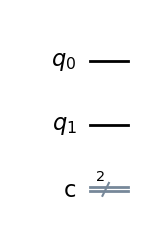

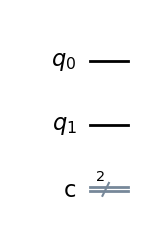

In [5]:
circuit.draw(output='mpl')

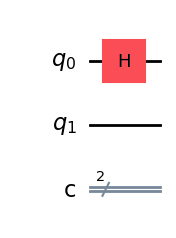

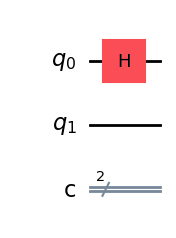

In [6]:
circuit.h(0)
circuit.draw(output='mpl')

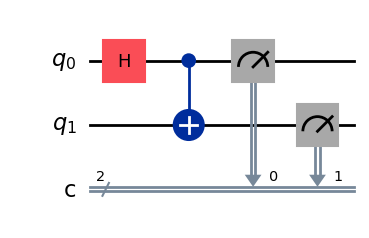

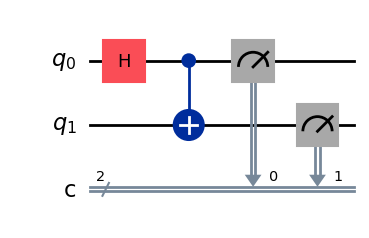

In [7]:
circuit.cx(0,1) # 0-> control qubit, 1-> target qubit
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

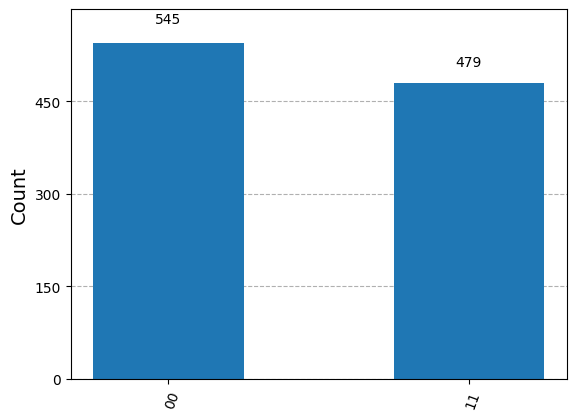

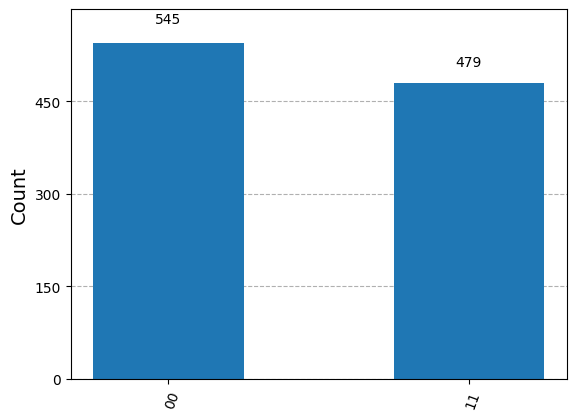

In [8]:
simulator = AerSimulator()
#pm_sim = generate_preset_pass_manager(backend=simulator, optimization_level=1)
#isa_qc_sim = pm_sim.run(circuit)
result_sim = simulator.run([circuit]).result()
plot_histogram(result_sim.get_counts())

Real

In [9]:
service = QiskitRuntimeService()

In [10]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token=open("apikey.txt","r").read(), overwrite=True)

In [11]:
service = QiskitRuntimeService(channel="ibm_quantum")

In [12]:
quantum_computer = service.backend("ibm_kyiv")

In [13]:
pm = generate_preset_pass_manager(backend=quantum_computer, optimization_level=1)

In [14]:
isa_qc = pm.run(circuit)

In [15]:
sampler = Sampler(quantum_computer)
job = sampler.run([isa_qc])
print(job)
#result = sampler.run([isa_qc]).result()
#plot_histogram(result[0].data.c.get_counts())

<RuntimeJobV2('cykcfx7rta1g008vvxt0', 'sampler')>


In [16]:
result = job.result()

In [17]:
pub_result = job.result()[0]

In [18]:
print(pub_result)

SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})


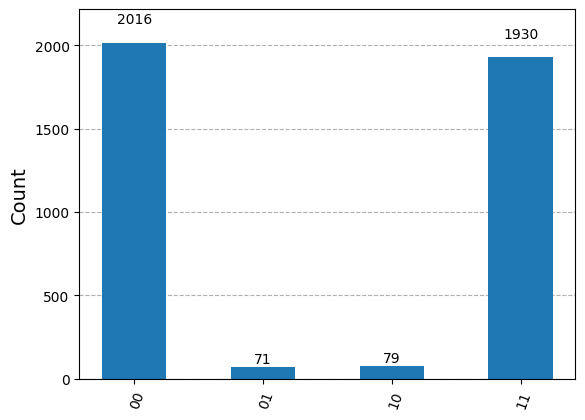

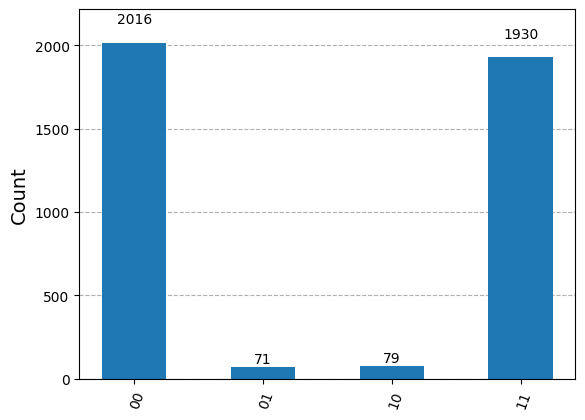

In [19]:
values = pub_result.data.c
plot_histogram(values.get_counts())


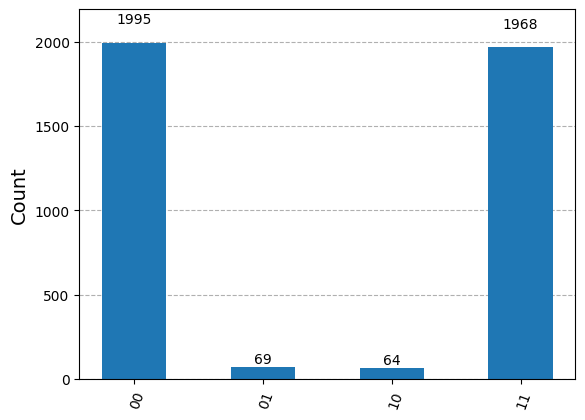

In [20]:
with Session(backend=quantum_computer) as session:
    sampler = Sampler()
    result = sampler.run([isa_qc]).result()
    plot_histogram(result[0].data.c.get_counts())